## Chicago Public Library: Supplementary Analysis

Sara Rasmussen (saralr2)  

To inform the model in my final project, I consulted the City of Chicago's Open Data Portal. 
The city provides the number of computer sessions per month, per library location, from the last four years. This information provides a general overview of trends in computer usage by month, year over year, as well as a sense of the volume of usage relative to the number of computers available. 

To focus my study, I looked at the Harold Washington Library Center (HWLC), the central library within the Chicago Public Library system, located in downtown Chicago.

Questions to answer:
- How many computers are available for public use at the HWLC? 
- How many computer sessions are there by month, and possibly by day, on average at HWLC? 

**Bibliography:**
- Chicago Data Portal. "Connect Chicago Locations - Historical." October 27, 2020. https://data.cityofchicago.org/Education/Connect-Chicago-Locations-Historical/bmus-hp7e. 
- Chicago Data Portal. "Libraries - 2016 Computer Sessions by Location." January 13, 2017. https://data.cityofchicago.org/dataset/Libraries-2016-Computer-Sessions-by-Location/w7uw-j3pp.
- Chicago Data Portal. "Libraries - 2017 Computer Sessions by Location." January 29, 2018. https://data.cityofchicago.org/dataset/Libraries-2017-Computer-Sessions-by-Location/8xex-yi9w. 
- Chicago Data Portal. "Libraries - 2018 Computer Sessions by Location." February 28, 2019. https://data.cityofchicago.org/dataset/Libraries-2018-Computer-Sessions-by-Location/jf4r-ngpg. 
- Chicago Data Portal. "Libraries - 2019 Computer Sessions by Location." March 3, 2020. https://data.cityofchicago.org/dataset/Libraries-2019-Computer-Sessions-by-Location/fhfm-vdz3. 

## Devices available at Harold Washington Library Center

The City of Chicago provides a second open dataset, Connect Chicago, which provides an overview of digital inclusion services available across the city. This includes computers and hotspots available for public use, wifi access, open hours etc. Filtering by organization type can yield all libraries, or by organization name to return specific results. 

In [18]:
# Read in the number of computers available by location
connect_chi = pd.read_json("https://data.cityofchicago.org/resource/bmus-hp7e.json?organization_type=Chicago%20Public%20Library&organization_name=Harold%20Washington%20Library-HWLC")
c_counts = connect_chi[['id','organization_name','hardware_public','hours']][connect_chi['hardware_public'].isnull() == False]
# Line up organization names, correct dtypes
# c_counts = c_counts.replace(to_replace=" Library",value="",regex=True)
c_counts['organization_name'] =  "Harold Washington Library Center"
c_counts

,id,organization_name,hardware_public,hours
0,101,Harold Washington Library Center,153,"M-TH: 9AM-9PM; F, SA: 9AM-5PM; SU: 1PM-5PM"


In [65]:
import requests
import pandas as pd

In [57]:
# Each year is held in a separate data file
# Read in and merge Chicago Public Libraries computer sessions by year
root = "https://data.cityofchicago.org/resource/"
branch = "location=Harold%20Washington%20Library%20Center"
c_16 = requests.get(root + "w7uw-j3pp.json?" + branch)
c_17 = requests.get(root + "8xex-yi9w.json?" + branch)
c_18 = requests.get(root + "jf4r-ngpg.json?" + branch)
c_19 = requests.get(root + "fhfm-vdz3.json?" + branch.upper())
sessions = c_16.json() + c_17.json() + c_18.json() + c_19.json()
for n in range(4):
    sessions[n]['year'] = 2016 + n
    print(sessions[n])

{'location': 'Harold Washington Library Center', 'january': '25824', 'february': '24903', 'march': '27381', 'april': '27870', 'may': '25735', 'june': '27354', 'july': '25761', 'august': '29447', 'september': '26007', 'october': '27915', 'november': '25038', 'december': '23336', 'ytd': '316571', 'year': 2016}
{'location': 'Harold Washington Library Center', 'january': '24526', 'february': '22334', 'march': '25605', 'april': '24119', 'may': '24112', 'june': '24213', 'july': '24737', 'august': '26132', 'september': '22665', 'october': '24591', 'november': '23249', 'december': '20846', 'ytd': '287129', 'year': 2017}
{'location': 'Harold Washington Library Center', 'january': '22341', 'february': '18832', 'march': '22371', 'april': '21540', 'may': '20215', 'june': '20442', 'july': '21005', 'august': '20991', 'september': '19443', 'october': '20907', 'november': '17656', 'december': '17196', 'ytd': '242939', 'year': 2018}
{'location': 'HAROLD WASHINGTON LIBRARY CENTER', 'address': '400 S. St

## Computer use has decreased year over year

This supports the argument that libraries no longer need to offer computers for public use, because "everyone has a computer in their pocket." 

However, even in the slowest year, at a busy library like HWLC, you're still seeing more than 16,000 unique computer sessions per month. (Note: Sessions != users. CPL may have the numbers on unique users, but in the interest of patron privacy, does not share it. What percentage of the card-holding population, or the population of Chicago's downtown, does this represent? Questiosn for another time.) 

In [58]:
cs = pd.DataFrame(sessions)
cs_by_year = cs.drop(labels=["location","ytd","address","city","zip"],axis="columns")
cs_by_year = cs_by_year.set_index('year').astype('int64')
cs_by_year

,january,february,march,april,may,june,july,august,september,october,november,december
year,,,,,,,,,,,,
2016,25824,24903,27381,27870,25735,27354,25761,29447,26007,27915,25038,23336
2017,24526,22334,25605,24119,24112,24213,24737,26132,22665,24591,23249,20846
2018,22341,18832,22371,21540,20215,20442,21005,20991,19443,20907,17656,17196
2019,17443,16750,18584,18672,17235,17547,18277,17353,16426,19176,16180,15940


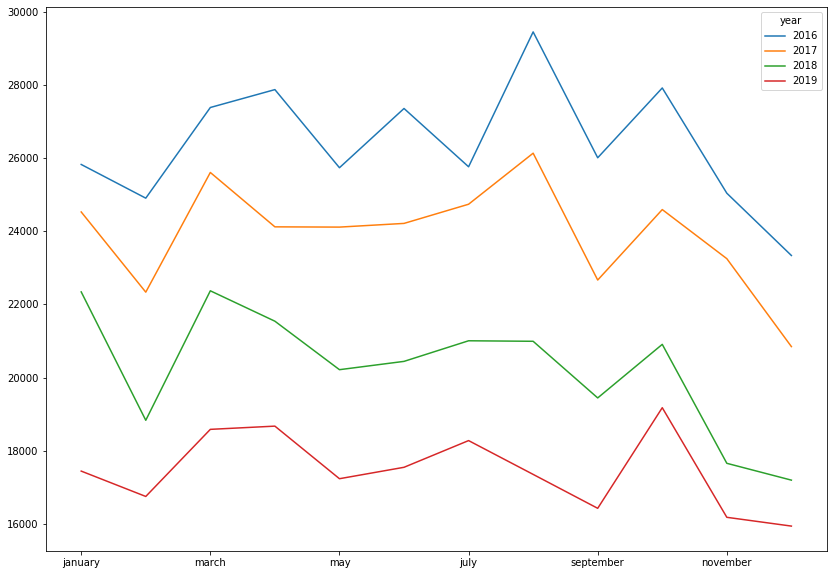

In [63]:
# Rotate the table for visualizing
# Source: https://stackoverflow.com/questions/21473570/how-to-plot-columns-on-x-axis-and-use-index-as-y-axis-using-pandas
cs_by_year.T.plot(figsize=(14,10))

## Roughly estimating sessions per day

From the SPL analysis, I know that the volume of sessions per day varies by day of week, week of month, and as we can see above, it also varies by month of year. This is further complicated by the reality that HWLC is open more hours on Mondays-Thursdays than on Fridays and Saturdays, with only a few open hours on Sundays. However, I need a quick approximation to inform the maximum end of my probability distribution of patron sessions per day. So here goes: 

In [55]:
days_in_month = {"january": 31,"february": 28,"march": 31,"april": 30,"may": 31,"june": 30,"july": 31,"august": 31,"september": 30,"october": 31,"november": 30, "december": 31}
spd = pd.DataFrame()
for month, num in days_in_month.items():
    #cs_by_year["avg sessions/ day: " + month] = cs_by_year[month] / num
    spd[month] = cs_by_year[month] / num
    
spd.astype('int64')  # Avg sessions per day (total sessions per month / number of days in month)

,january,february,march,april,may,june,july,august,september,october,november,december
year,,,,,,,,,,,,
2016,833,889,883,929,830,911,831,949,866,900,834,752
2017,791,797,825,803,777,807,797,842,755,793,774,672
2018,720,672,721,718,652,681,677,677,648,674,588,554
2019,562,598,599,622,555,584,589,559,547,618,539,514
